In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_paper2019/mplstyles


# Summary

The purpose of this book is to show how the extracted Fano factor, combined with the expected yield with plus multiple-scatter modification, can predict the trend of the EDELWEISS measured ionization yield width. And, how that final predicted width function can be used to extract the systematic deviation due to the finite binning of the EDELWEISS data. 

# Extracted Fano Factor Matching

In [2]:
import fano_calc as fc
#recall defaults (filename='test.h5', 
#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
E,sig = fc.RWCalc(filename='data/res_calc.h5',band='NR',alpha=(1/18.0),F=999)
Ebase,sigbase = fc.RWCalc(filename='data/res_calc.h5',band='NR',alpha=(1/18.0),F=000)

In [3]:
import h5py
filename = 'data/systematic_error_fits.h5'
#remove vars
f = h5py.File(filename,'r')
for i in f['mcmc/edwdata_sys_error']:
    print(i)

#save the results for the Edw fit
path='{}/{}/'.format('mcmc','edwdata_sys_error')

Cms = np.asarray(f[path+'Cms'])
slope = np.asarray(f[path+'m'])
a_yield = np.asarray(f[path+'A'])
b_yield = np.asarray(f[path+'B'])
aH = np.asarray(f[path+'aH'])
scale = np.asarray(f[path+'scale'])
samples = np.asarray(f[path+'samples'])
sampsize = np.asarray(f[path+'sampsize'])
xl = np.asarray(f[path+'Er'])
upvec = np.asarray(f[path+'Csig_u'])
dnvec = np.asarray(f[path+'Csig_l'])
Sigtot = np.asarray(f[path+'Sigss'])
Sigss = np.sqrt(Sigtot**2 - (Cms+slope*xl)**2)

print(Cms)
print(samples[0:5,:])
f.close()

A
B
Cms
Csig_l
Csig_u
Er
Sigss
aH
m
samples
sampsize
scale
0.040112000594491624
[[1.50381624e-02 4.31804341e-02 2.23413626e-05 1.05046922e+00
  8.18547846e-02 2.04466981e-01]
 [1.51415346e-02 4.35824578e-02 1.31947144e-05 1.04823979e+00
  8.24564001e-02 1.90742152e-01]
 [1.51415346e-02 4.35824578e-02 1.31947144e-05 1.04823979e+00
  8.24564001e-02 1.90742152e-01]
 [1.51415346e-02 4.35824578e-02 1.31947144e-05 1.04823979e+00
  8.24564001e-02 1.90742152e-01]
 [1.51415346e-02 4.35824578e-02 1.31947144e-05 1.04823979e+00
  8.24564001e-02 1.90742152e-01]]


In [4]:
# import data from Edelweiss
import pandas as pds
res_data = pds.read_csv("data/edelweiss_NRwidth_GGA3_data.txt", skiprows=1, \
                       names=['E_recoil', 'sig_NR', 'E_recoil_err', 'sig_NR_err'], \
                       delim_whitespace=True)

resER_data = pds.read_csv("data/edelweiss_ERwidth_GGA3_data.txt", skiprows=1, \
                         names=['E_recoil', 'sig_ER', 'sig_ER_err'], \
                         delim_whitespace=True)

resER_data = resER_data.sort_values(by='E_recoil')

print (res_data.head(10))
E_recoil = res_data["E_recoil"]
sig_NR = res_data["sig_NR"]
sig_NR_err = res_data['sig_NR_err']
E_recoil_ER = resER_data["E_recoil"]
sig_ER = resER_data["sig_ER"]
sig_ER_err = resER_data['sig_ER_err']

#order those things
idx = np.argsort(E_recoil)
E_recoil = E_recoil[idx]
sig_NR = sig_NR[idx]
sig_NR_err = sig_NR_err[idx]

#make a selectable version of the minimum index
minidx = 2

   E_recoil    sig_NR  E_recoil_err  sig_NR_err
0   16.1946  0.062345      0.946176    0.001157
1   16.4428  0.062345      0.945278    0.001157
2   44.2627  0.046528      0.992477    0.001543
3   24.5012  0.059397      0.992477    0.001185
4   97.7172  0.044847      1.033260    0.002783
5   58.4014  0.050082      0.991830    0.002288
6   34.2156  0.053417      1.033260    0.001102


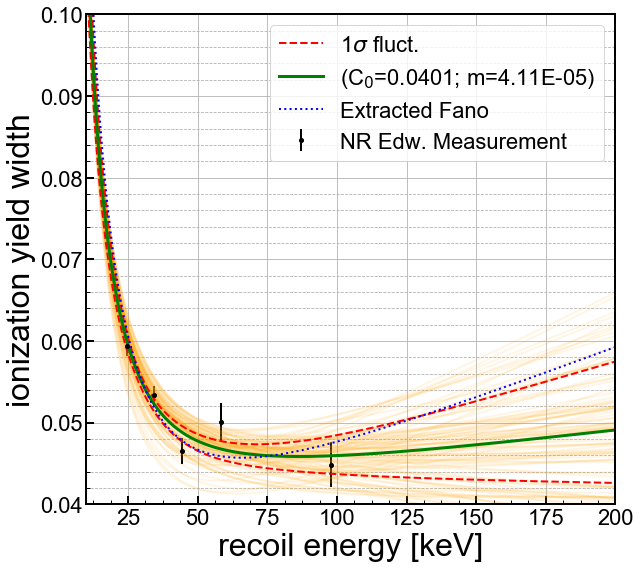

In [5]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

for aH_em, Cms_em, m_em, scale_em, A_em, B_em in samples[np.random.randint(len(samples), size=100)]:
    ax1.plot(xl, np.sqrt(Sigss**2+(Cms_em+m_em*xl)**2), color="orange", alpha=0.1)

ax1.plot(xl,upvec,color='r',linestyle="--",linewidth=2, \
         label='1$\sigma$ fluct.')
ax1.plot(xl,dnvec,color='r',linestyle="--",linewidth=2, \
         label='')


ax1.plot(xl,np.sqrt(Sigss**2+(Cms+xl*slope)**2),color='g',linestyle="-",linewidth=3, \
         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms,slope))

ax1.plot(E,sig,color='b',linestyle=":",linewidth=2, \
        label = 'Extracted Fano')

ax1.errorbar(E_recoil[minidx::],sig_NR[minidx::], yerr=sig_NR_err[minidx::], \
         color='k', marker='o', markersize=4,linestyle='none',label='NR Edw. Measurement', linewidth=2)

ymin = 0.04
ymax = 0.1



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

# Binning Systematic

energy bin|interval (keV)
:-|:-
0|\[5,10)
1|\[10,20)
2|\[20,30)
3|\[30,40)
4|\[40,50)
5|\[50,70)
6|\[70,150)

In [6]:
bins = [5, 10, 20, 30, 40, 50, 70,150]
bins = np.asarray(bins)

In order to evaluate the systematic we can approximate that the distribution in ionization yield at each energy is normal. That is it follows the probability distribution function:

\begin{equation}
P(Q|E_r) = \frac{1}{\sqrt{2\pi\sigma_Q(E_r)^2}} \exp{\left[\frac{(Q-\bar{Q})^2}{2\sigma_Q(E_r)^2}\right]},
\end{equation}

Is valid for a fixed energy, $E_r$. 

Using the law of conditional probability we can then simply obtain the joint distribution $P(Q,E_r)$ and integrate over the recoil energy bin. We get the following:

\begin{equation}
P_i(Q) = \frac{\int_{a_i}^{b_i} dE_r P(Q|E_r)P(E_r)}{N},
\end{equation}

where N is a normalization factor, $P_i(Q)$ is the yield probability distribution over the bin $i$, and $P(E_r)$ is the probability of getting a given recoil energy (approximated throughout this analysis as an exponential with decay coefficient $\alpha$ = (1/18.0) keV$^{-1}$).

With this function the _measured_ yield width over a finite bin can be calculated quite simply:

\begin{equation}
\begin{aligned}
\langle Q \rangle &= \int_{-\infty}^{\infty} dQ Q P(Q) \\
\langle Q^2 \rangle &= \int_{-\infty}^{\infty} dQ Q^2 P(Q) \\
\sigma_{Qi} &= \sqrt{\langle Q^2 \rangle - \langle Q \rangle^2}
\end{aligned}
\end{equation}

In [7]:
#let's find the corrections for the best fit points
import binning_sys as bsys


print(bins)
delta = lambda C,m: bsys.getBinSys(C,m,bins=bins)[1]
deltav = np.vectorize(delta)


del110 = deltav(Cms,slope)
del110 = np.array(del110)
print(del110)
#print(np.shape(deltav(Candm[:,0],Candm[:,1])))
#del110 = deltav(Candm[:,0],Candm[:,1])
#print(delta(Candm[0,0],Candm[0,1]))

[  5  10  20  30  40  50  70 150]
[0.95090318 0.93151709 0.97537397 0.98806036 0.99327094 0.98675077
 0.97495657]


In [8]:
#let's make a callable out of the predicted single-scatter resolution
import scipy.interpolate as inter

sigQnr_c = inter.InterpolatedUnivariateSpline(Ebase, sigbase, k=3)
sigQnr_c_v = np.vectorize(sigQnr_c)

In [9]:
def log_likelihood(theta, x, y, yerr,sigfunc):
    Cms, m = theta
    model = np.sqrt(sigfunc(x)**2 + (Cms+m*x)**2)
    #sigma2 = yerr**2 + model**2*np.exp(2*log_f)
    sigma2 = yerr**2
    return -0.5*np.sum((y-model)**2/sigma2 + np.log(sigma2))

In [10]:
from scipy.optimize import minimize
np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([0.0207, 4.73e-5]) + 0.001*np.random.randn(2)
soln = minimize(nll, initial, args=(E_recoil[minidx::], sig_NR[minidx::], sig_NR_err[minidx::],sigQnr_c_v))
Cms_ml, m_ml = soln.x

#lmfout = lmf.minimize(residual_const, params, args=(E_recoil[2::], sig_NR[2::], sig_NR_err[2::],sigQnr_c_v))
print("Maximum likelihood estimates:")
print("m = {0:.4f}".format(Cms_ml))
print("b = {0:.3e}".format(m_ml))


Maximum likelihood estimates:
m = 0.0313
b = 1.300e-04


In [11]:
#do correction to data points
E_edw = E_recoil
sig_edw = sig_NR*del110
sig_edw_err = sig_NR_err*del110
print(bins)
print(del110)

print(E_edw)
print(sig_NR)
print(sig_edw)
print(sig_edw_err)

nll = lambda *args: -log_likelihood(*args)
initial = np.array([0.0207, 4.73e-5]) + 0.001*np.random.randn(2)
soln = minimize(nll, initial, args=(E_edw[minidx::], sig_edw[minidx::], sig_edw_err[minidx::],sigQnr_c_v))
Cms_ml, m_ml = soln.x

#lmfout = lmf.minimize(residual_const, params, args=(E_recoil[2::], sig_NR[2::], sig_NR_err[2::],sigQnr_c_v))
print("Maximum likelihood estimates:")
print("m = {0:.4f}".format(Cms_ml))
print("b = {0:.3e}".format(m_ml))

[  5  10  20  30  40  50  70 150]
[0.95090318 0.93151709 0.97537397 0.98806036 0.99327094 0.98675077
 0.97495657]
0    16.1946
1    16.4428
3    24.5012
6    34.2156
2    44.2627
5    58.4014
4    97.7172
Name: E_recoil, dtype: float64
0    0.062345
1    0.062345
3    0.059397
6    0.053417
2    0.046528
5    0.050082
4    0.044847
Name: sig_NR, dtype: float64
0    0.059284
1    0.058076
3    0.057934
6    0.052779
2    0.046215
5    0.049419
4    0.043724
Name: sig_NR, dtype: float64
0    0.001101
1    0.001078
3    0.001156
6    0.001089
2    0.001533
5    0.002257
4    0.002714
Name: sig_NR_err, dtype: float64
Maximum likelihood estimates:
m = 0.0296
b = 1.418e-04


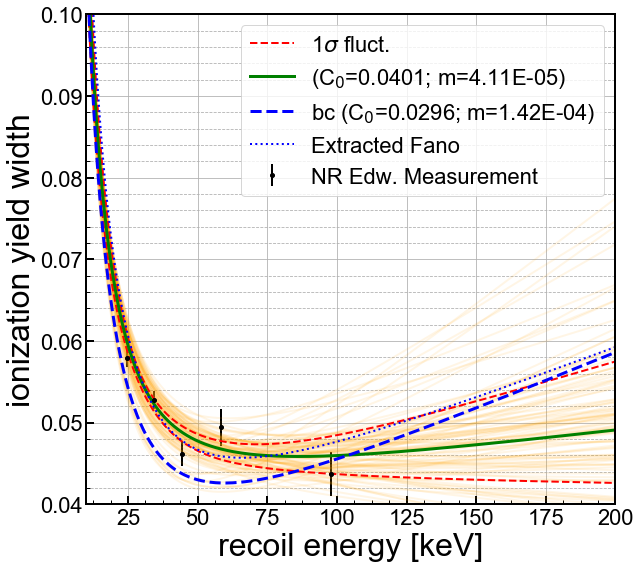

In [16]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

for aH_em, Cms_em, m_em, scale_em, A_em, B_em in samples[np.random.randint(len(samples), size=100)]:
    ax1.plot(xl, np.sqrt(Sigss**2+(Cms_em+m_em*xl)**2), color="orange", alpha=0.1)

ax1.plot(xl,upvec,color='r',linestyle="--",linewidth=2, \
         label='1$\sigma$ fluct.')
ax1.plot(xl,dnvec,color='r',linestyle="--",linewidth=2, \
         label='')


ax1.plot(xl,np.sqrt(Sigss**2+(Cms+xl*slope)**2),color='g',linestyle="-",linewidth=3, \
         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms,slope))

ax1.plot(xl,np.sqrt(Sigss**2+(Cms_ml+xl*m_ml)**2),color='b',linestyle="--",linewidth=3, \
         label='bc (C$_0$={:01.3}; m={:01.2E})'.format(Cms_ml,m_ml))

ax1.plot(E,sig,color='b',linestyle=":",linewidth=2, \
        label = 'Extracted Fano')

ax1.errorbar(E_recoil[minidx::],sig_edw[minidx::], yerr=sig_edw_err[minidx::], \
         color='k', marker='o', markersize=4,linestyle='none',label='NR Edw. Measurement', linewidth=2)

ymin = 0.04
ymax = 0.1



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

In [13]:
import h5py
filename = 'data/test_bs.h5'
#remove vars
f = h5py.File(filename,'r')

#save the results for the Edw fit
path='{}/{}/'.format('mcmc','edwdata_binsys')

bins_binsys = np.asarray(f[path+'bins_binsys'])
binsys = np.asarray(f[path+'binsys'])


#print(binsys)
Nsamp = np.shape(binsys)[0]
print(Nsamp)
f.close()

100


KeyboardInterrupt: 

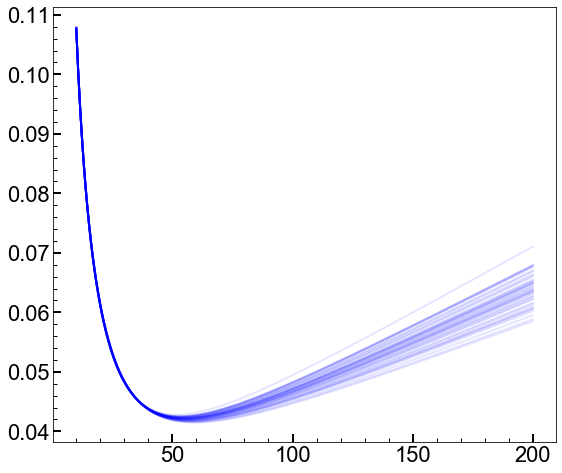

In [15]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

for di in binsys:
    #print(di)
    soln = minimize(nll, initial, args=(E_edw[minidx::], sig_edw[minidx::]*di[minidx::],  \
                                        sig_edw_err[minidx::]*di[minidx::],sigQnr_c_v))
    Cms_mli, m_mli = soln.x
    #print(Cms_mli,m_mli)
    ax1.plot(xl, np.sqrt(Sigss**2+(Cms_mli+m_mli*xl)**2), color="blue", alpha=0.1)

ax1.plot(xl,upvec,color='r',linestyle="--",linewidth=2, \
         label='1$\sigma$ fluct.')
ax1.plot(xl,dnvec,color='r',linestyle="--",linewidth=2, \
         label='')


ax1.plot(xl,np.sqrt(Sigss**2+(Cms+xl*slope)**2),color='g',linestyle="-",linewidth=3, \
         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms,slope))

ax1.plot(xl,np.sqrt(Sigss**2+(Cms_ml+xl*m_ml)**2),color='b',linestyle="--",linewidth=3, \
         label='bc (C$_0$={:01.3}; m={:01.2E})'.format(Cms_ml,m_ml))

ax1.plot(E,sig,color='b',linestyle=":",linewidth=2, \
        label = 'Extracted Fano')

ax1.errorbar(E_recoil[minidx::],sig_edw[minidx::], yerr=sig_edw_err[minidx::], \
         color='k', marker='o', markersize=4,linestyle='none',label='NR Edw. Measurement', linewidth=2)

ymin = 0.04
ymax = 0.1



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()